<a href="https://colab.research.google.com/github/yestrella14/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')
df.head(3)

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [4]:
sample20 = df.sample(n=20, random_state=42)
sample200 = df.sample(n=200, random_state=42)

In [5]:
sample20.tail(3)

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
2233,66421,"Yes, full-time",Employed full-time,"Computer science, computer engineering, or sof...",DevOps specialist,3-5 years,0-2 years,40196.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Immediately after graduating,C;Java;JavaScript;Perl;Python;SQL;HTML;CSS;Bas...,Male,18 - 24 years old,White or of European descent
1688,50525,No,Employed full-time,"Another engineering discipline (ex. civil, ele...",Front-end developer;Full-stack developer,6-8 years,0-2 years,9706.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;C++;Go;JavaScript;PHP;Python;TypeScript;HTML...,Male,18 - 24 years old,South Asian
1268,36971,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;Database administrator;Desi...,30 or more years,30 or more years,128544.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;JavaScript;Ruby;VBA;Visual Basic 6,Male,55 - 64 years old,White or of European descent


In [6]:
sample200.tail(3)

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
2687,81659,No,"Not employed, but looking for work",Fine arts or performing arts (ex. graphic desi...,Designer;Front-end developer,0-2 years,0-2 years,20616.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,I haven’t gotten a developer job,JavaScript;PHP;HTML;CSS,Female,25 - 34 years old,White or of European descent
2442,72394,No,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,3-5 years,0-2 years,9672.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,Four to six months,JavaScript;SQL;HTML;CSS,Male,18 - 24 years old,Hispanic or Latino/Latina
617,18145,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Designer;Desktop or enterpr...,27-29 years,18-20 years,58392.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,35 - 44 years old,White or of European descent


**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [7]:
mean_sample20 =sample20['ConvertedSalary'].mean()
mean_sample20

55752.2

In [8]:
mean_sample200= sample200['ConvertedSalary'].mean()
mean_sample200

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I trust more the sample with larger population. In this case, the data with 200 samples. As the sample size increases, the more likely it represent the population. Perphas a non tecnical audience would not be able to identify which is more trustworthy

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

No.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



Provide a confidence interval and a marging of error

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [11]:
#Create a function to calculate the confidence interval

def confidence_interval(mydata, confidence=0.95):

    #Conver the data to an numpy array in case user passed in a list
    sample_data = np.array(mydata)
    #Sample mean
    sample_mean = np.mean(sample_data)
    #sample size
    n = len(sample_data)
    #Sample standard deviation must pass degree of freedon =1 or will get the population std
    sample_std=np.std(sample_data, ddof=1)

    #Calculate The sample standard error
    sample_stderr = sample_std/np.sqrt(n)
    #Need to find the t statistic using stats.t.ppf
    #Pass the degree of freedon (n-1)
    #Pass the confidence level +1 divided by 2 to calculate the probability cutoff correcponding to the confidence level
    sample_tstatistic = stats.t.ppf((1 + confidence) / 2.0, n - 1) # just looking up the corresponding t-stat.
    margin_of_error = sample_stderr * sample_tstatistic

    lower_bound =sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    return (lower_bound, sample_mean, upper_bound, margin_of_error)

In [12]:
sample20['ConvertedSalary'].mean()

55752.2

In [16]:
confidence_interval(sample20['ConvertedSalary'])

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [17]:
confidence_interval(sample200['ConvertedSalary'])

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

In [15]:
mean_sample200

68551.255

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [18]:
#Mean of sample of 20
print("Mean of sample of 20: ", mean_sample20)

n20= len(sample20['ConvertedSalary'])
#Calculation for marging of error

#Standard deviation
sample_std20=np.std(sample20['ConvertedSalary'], ddof=1)
#Calculate The sample standard error
sample_stderr20 = sample_std20/np.sqrt(n20)
sample20_tstatistic = stats.t.ppf((1 + 0.95) / 2.0, n20 - 1) # just looking up the corresponding t-stat.
margin_of_error20 = sample_stderr20 * sample20_tstatistic

print('Marging Of Error of Sample 20: ', margin_of_error20)

Mean of sample of 20:  55752.2
Marging Of Error of Sample 20:  19947.096903744638


In [21]:
#Mean of sample of 200
print("Mean of sample of 200: ", mean_sample200)

n200= len(sample200['ConvertedSalary'])
#Calculation for marging of error

#Standard deviation
sample_std200=np.std(sample200['ConvertedSalary'], ddof=1)
#Calculate The sample standard error
sample_stderr200 = sample_std200/np.sqrt(n200)
sample200_tstatistic = stats.t.ppf((1 + 0.95) / 2.0, n200 - 1) # just looking up the corresponding t-stat.
margin_of_error200 = sample_stderr200 * sample200_tstatistic

print('Marging Of Error of Sample 200: ', margin_of_error200)

Mean of sample of 200:  68551.255
Marging Of Error of Sample 200:  7958.196195520917


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

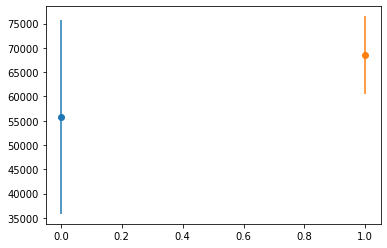

In [30]:

#x position set to 0
#yerror is the marging of error
#Pass in format center point as a dot (fmt='o')
plt.errorbar(0, mean_sample20, yerr=margin_of_error20, fmt='o')
plt.errorbar(1, mean_sample200, yerr=margin_of_error200, fmt='o')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

<BarContainer object of 1 artists>

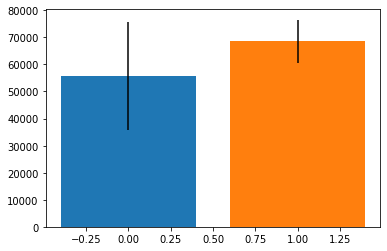

In [32]:
plt.bar(0, mean_sample20, yerr=margin_of_error20)
plt.bar(1, mean_sample200, yerr=margin_of_error200)

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [34]:
#Lets gather the population converted Salary
population_convertedSalary = df['ConvertedSalary']
population_convertedSalary

0       120000.0
1        36000.0
2        59980.0
3        70000.0
4       105000.0
          ...   
2756    180000.0
2757     36716.0
2758      2904.0
2759     60000.0
2760      1332.0
Name: ConvertedSalary, Length: 2761, dtype: float64

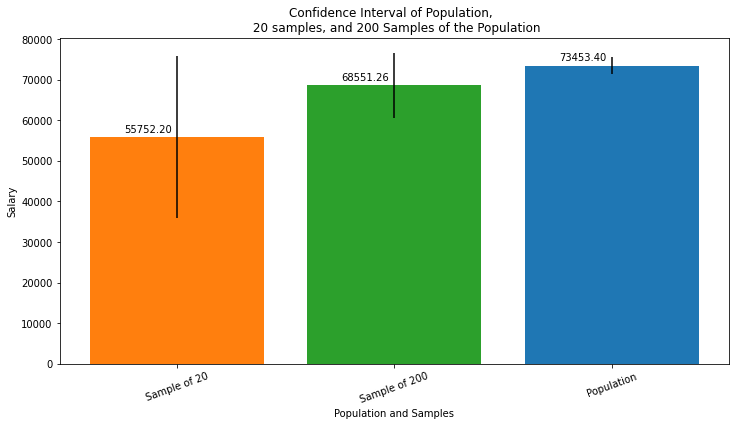

In [112]:
#Use the function created
lower_bound, sample_mean, upper_bound, margin_of_error = confidence_interval(population_convertedSalary)


fig = plt.figure(figsize=(12,6))
ax= fig.add_subplot(111)

xlabel=['Sample of 20', 'Sample of 200', 'Population']
position = np.arange(len(xlabel))

rects1 = ax.bar(2, sample_mean, yerr=margin_of_error, label='Population')
rects2 = ax.bar(0, mean_sample20, yerr=margin_of_error20, label='20 Samples')
rects3 = ax.bar(1, mean_sample200, yerr=margin_of_error200, label='200 Samples')
ax.set_title('Confidence Interval of Population,  \n 20 samples, and 200 Samples of the Population')
ax.set_xlabel('Population and Samples')
ax.set_ylabel('Salary')

ax.set_xticks(position)
ax.set_xticklabels(xlabel, rotation=20)

#This function was found at matplotlib.org
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(-5, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='right', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.show()



In [113]:
print(f'Sample of 20 Mean: ', mean_sample20)
print(f'Sample of 20 Margin of Error: ', margin_of_error20)
print('\n')
print(f'Sample of 200 Mean: ', mean_sample200)
print(f'Sample of 200 Margin of Error: ', margin_of_error200)
print('\n')
print(f'Population Mean: ', sample_mean)
print(f'Population Margin of Error: ', margin_of_error)
print('\n')

Sample of 20 Mean:  55752.2
Sample of 20 Margin of Error:  19947.096903744638


Sample of 200 Mean:  68551.255
Sample of 200 Margin of Error:  7958.196195520917


Population Mean:  73453.40420137631
Population Margin of Error:  2153.574339128457




**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision refers to how close together my values are. The closer the value the more precises my stimate is. Accuracy refers to an estimate of how close my reported value is centered to the true value.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

A confidence interval of 95% captures 95% of potential sample means.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.